In [1]:
from rdkit import Chem
import numpy as np

In [2]:
smiles_string = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"

In [3]:
rdkit_mol = Chem.MolFromSmiles(smiles_string)

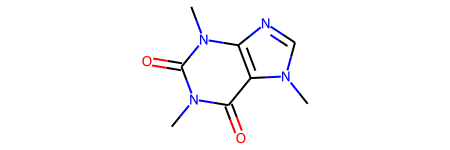

In [4]:
rdkit_mol

In [5]:
rdkit_mol_with_Hs = Chem.AddHs(rdkit_mol)

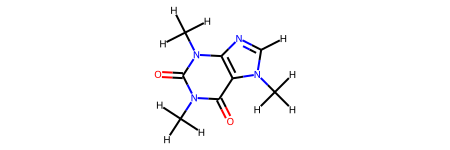

In [6]:
rdkit_mol_with_Hs

In [10]:
def OrganicEncoderOneHot(atom_vec, max_num=4):
    one_hot = np.zeros((atom_vec.size, max_num))
    one_hot[np.arange(atom_vec.size), atom_vec] = 1
    return one_hot

In [12]:
AtomList = ['H', "C", 'N', "O"]

In [11]:
BondList = [Chem.rdchem.BondType.SINGLE,
            Chem.rdchem.BondType.DOUBLE,
            Chem.rdchem.BondType.TRIPLE,
            Chem.rdchem.BondType.AROMATIC]

In [18]:
def Atom_Embedding_Func(mol):
    atom_vec = np.array([AtomList.index(x.GetSymbol()) for x in mol.GetAtoms()])
    return OrganicEncoderOneHot(atom_vec)

In [31]:
def Bond_Embedding_Func(mol):
    bond_vec = np.array([BondList.index(bond.GetBondType()) for bond in mol.GetBonds()])
    return OrganicEncoderOneHot(bond_vec)

In [33]:
def GetConnectivity(mol, undirected=True):
    edge_list = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_list.append([i, j])
    if undirected:
        return np.array(edge_list + [[y, x] for x, y in edge_list])
    else:
        return np.array(edge_list)

In [36]:
atoms = Atom_Embedding_Func(rdkit_mol_with_Hs)

In [35]:
bonds = Bond_Embedding_Func(rdkit_mol_with_Hs)

In [34]:
connectivty = GetConnectivity(rdkit_mol_with_Hs)

array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 6,  8],
       [ 8,  9],
       [ 9, 10],
       [ 9, 11],
       [11, 12],
       [ 8, 13],
       [ 5,  1],
       [11,  4],
       [ 0, 14],
       [ 0, 15],
       [ 0, 16],
       [ 2, 17],
       [12, 18],
       [12, 19],
       [12, 20],
       [13, 21],
       [13, 22],
       [13, 23],
       [ 1,  0],
       [ 2,  1],
       [ 3,  2],
       [ 4,  3],
       [ 5,  4],
       [ 6,  5],
       [ 7,  6],
       [ 8,  6],
       [ 9,  8],
       [10,  9],
       [11,  9],
       [12, 11],
       [13,  8],
       [ 1,  5],
       [ 4, 11],
       [14,  0],
       [15,  0],
       [16,  0],
       [17,  2],
       [18, 12],
       [19, 12],
       [20, 12],
       [21, 13],
       [22, 13],
       [23, 13]])

## Convert back to SMILES
#### Use RDKIT